In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Diabetes_raw_dataset.csv')
df.head()  # first 5 records

,Patient number,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm),Diabetes
0,1,193.0,77.0,49.0,3.9,19,female,154.9,54.93,54,22.88,118.0,70.0,81.3,96.5,No diabetes
1,2,146.0,79.0,41.0,3.6,19,female,152.4,98.97,61,42.61,108.0,58.0,83.8,101.6,No diabetes
2,3,217.0,75.0,54.0,4.0,20,female,170.2,116.22,85,40.13,110.0,72.0,101.6,114.3,No diabetes
3,4,226.0,97.0,70.0,3.2,20,female,162.6,54.03,52,20.44,122.0,64.0,78.7,99.1,No diabetes
4,5,164.0,91.0,67.0,2.4,20,female,177.8,83.08,64,26.28,122.0,86.0,81.3,99.1,No diabetes


In [3]:
df.shape  #rows & columns count, finding all the data is present

(500, 16)

In [4]:
df.info()  #datatype of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient number        500 non-null    int64  
 1    Cholesterol (mg/dl)  499 non-null    float64
 2   Glucose (mg/dl)       499 non-null    float64
 3   HDL Chol (mg/dl)      499 non-null    float64
 4   TChol/HDL ratio       499 non-null    float64
 5   Age                   500 non-null    int64  
 6   Gender                495 non-null    object 
 7   Height /stature (cm)  500 non-null    float64
 8   weight1 (Kg)          500 non-null    float64
 9   weight2(Kg)           500 non-null    int64  
 10  BMI (Kg/m^2)          500 non-null    float64
 11  Systolic BP           498 non-null    float64
 12  Diastolic BP          498 non-null    float64
 13  waist (cm)            500 non-null    float64
 14  hip (cm)              500 non-null    float64
 15  Diabetes              4

In [5]:
df.nunique()

Patient number          500
 Cholesterol (mg/dl)    158
Glucose (mg/dl)         118
HDL Chol (mg/dl)         76
TChol/HDL ratio          69
Age                      68
Gender                    2
Height /stature (cm)     23
weight1 (Kg)            142
weight2(Kg)              80
BMI (Kg/m^2)            327
Systolic BP              73
Diastolic BP             56
waist (cm)               31
hip (cm)                 32
Diabetes                  2
dtype: int64

## 1. Data Preprocessing
- To make the data more suitable for models to learn from
- To avoid inconsistency in the data

In [6]:
# To reduce the complexity of the model, converting non-numerical data into numerical

df['Gender'].replace(['male', 'female'], [0, 1],inplace=True)  # replacing Gender: male -> 0 , female -> 1
df['Diabetes'].replace(['No diabetes', 'Diabetes'], [0, 1], inplace=True) # replacing Diabetes: No Diabetes -> 0 , Diabetes -> 1

In [7]:
df.tail()  #last 5 records

,Patient number,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm),Diabetes
495,496,155.0,58.0,69.0,2.2,26,0.0,185.4,72.19,79,21.00,110.0,76.0,76.2,88.9,0.0
496,497,179.0,90.0,60.0,3.0,26,1.0,152.4,93.07,59,40.07,138.0,84.0,81.3,101.6,0.0
497,498,283.0,83.0,74.0,3.8,26,0.0,182.9,65.83,103,19.68,158.0,104.0,104.1,111.8,0.0
498,499,228.0,79.0,37.0,6.2,26,0.0,182.9,97.16,118,29.05,122.0,90.0,121.9,124.5,0.0
499,500,220.0,60.0,66.0,3.3,26,0.0,177.8,72.64,68,22.98,136.0,88.0,83.8,99.1,NaN


In [8]:
df.isnull().sum()  # finding the missing data

Patient number          0
 Cholesterol (mg/dl)    1
Glucose (mg/dl)         1
HDL Chol (mg/dl)        1
TChol/HDL ratio         1
Age                     0
Gender                  5
Height /stature (cm)    0
weight1 (Kg)            0
weight2(Kg)             0
BMI (Kg/m^2)            0
Systolic BP             2
Diastolic BP            2
waist (cm)              0
hip (cm)                0
Diabetes                7
dtype: int64

##### _note_: The missing data can be handled in different ways:

 - Removing the particular rows (leads to loss of information)<br>
 - Replace with most frequent values or mean value (preferred method)

Here we are following 2nd method-replacing with frequent values

In [9]:
df = df.fillna(df.mode().iloc[0])  #updating the null values with frequent values
df.isnull().sum()  # validating whether any data is missed

Patient number          0
 Cholesterol (mg/dl)    0
Glucose (mg/dl)         0
HDL Chol (mg/dl)        0
TChol/HDL ratio         0
Age                     0
Gender                  0
Height /stature (cm)    0
weight1 (Kg)            0
weight2(Kg)             0
BMI (Kg/m^2)            0
Systolic BP             0
Diastolic BP            0
waist (cm)              0
hip (cm)                0
Diabetes                0
dtype: int64

In [10]:
df.describe()

,Patient number,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm),Diabetes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,250.500000,208.190000,127.988000,50.324000,4.469600,46.488000,0.576000,166.934600,82.46394,80.028000,29.694020,139.674000,82.702000,95.82800,109.113200,0.14600
std,144.481833,50.642939,413.662434,17.126753,1.651366,17.629278,0.494685,14.551164,46.39359,18.888111,18.010717,56.862381,13.579617,15.86429,14.299882,0.35346
min,1.000000,2.000000,48.000000,1.000000,1.500000,19.000000,0.000000,0.000000,0.00000,0.000000,0.000000,90.000000,48.000000,0.00000,76.200000,0.00000
25%,125.750000,178.000000,81.000000,39.000000,3.200000,31.000000,0.000000,160.000000,68.10000,68.000000,22.980000,120.000000,74.000000,83.80000,99.100000,0.00000
50%,250.500000,203.500000,89.000000,46.000000,4.200000,43.000000,1.000000,167.600000,79.00000,78.000000,28.130000,136.000000,82.000000,94.00000,106.700000,0.00000
75%,375.250000,229.250000,106.250000,59.000000,5.300000,61.000000,1.000000,175.300000,90.80000,90.000000,33.830000,148.000000,90.000000,104.10000,116.800000,0.00000
max,500.000000,500.000000,9091.000000,120.000000,19.300000,92.000000,1.000000,193.000000,996.98000,148.000000,377.280000,1140.000000,124.000000,142.20000,162.600000,1.00000


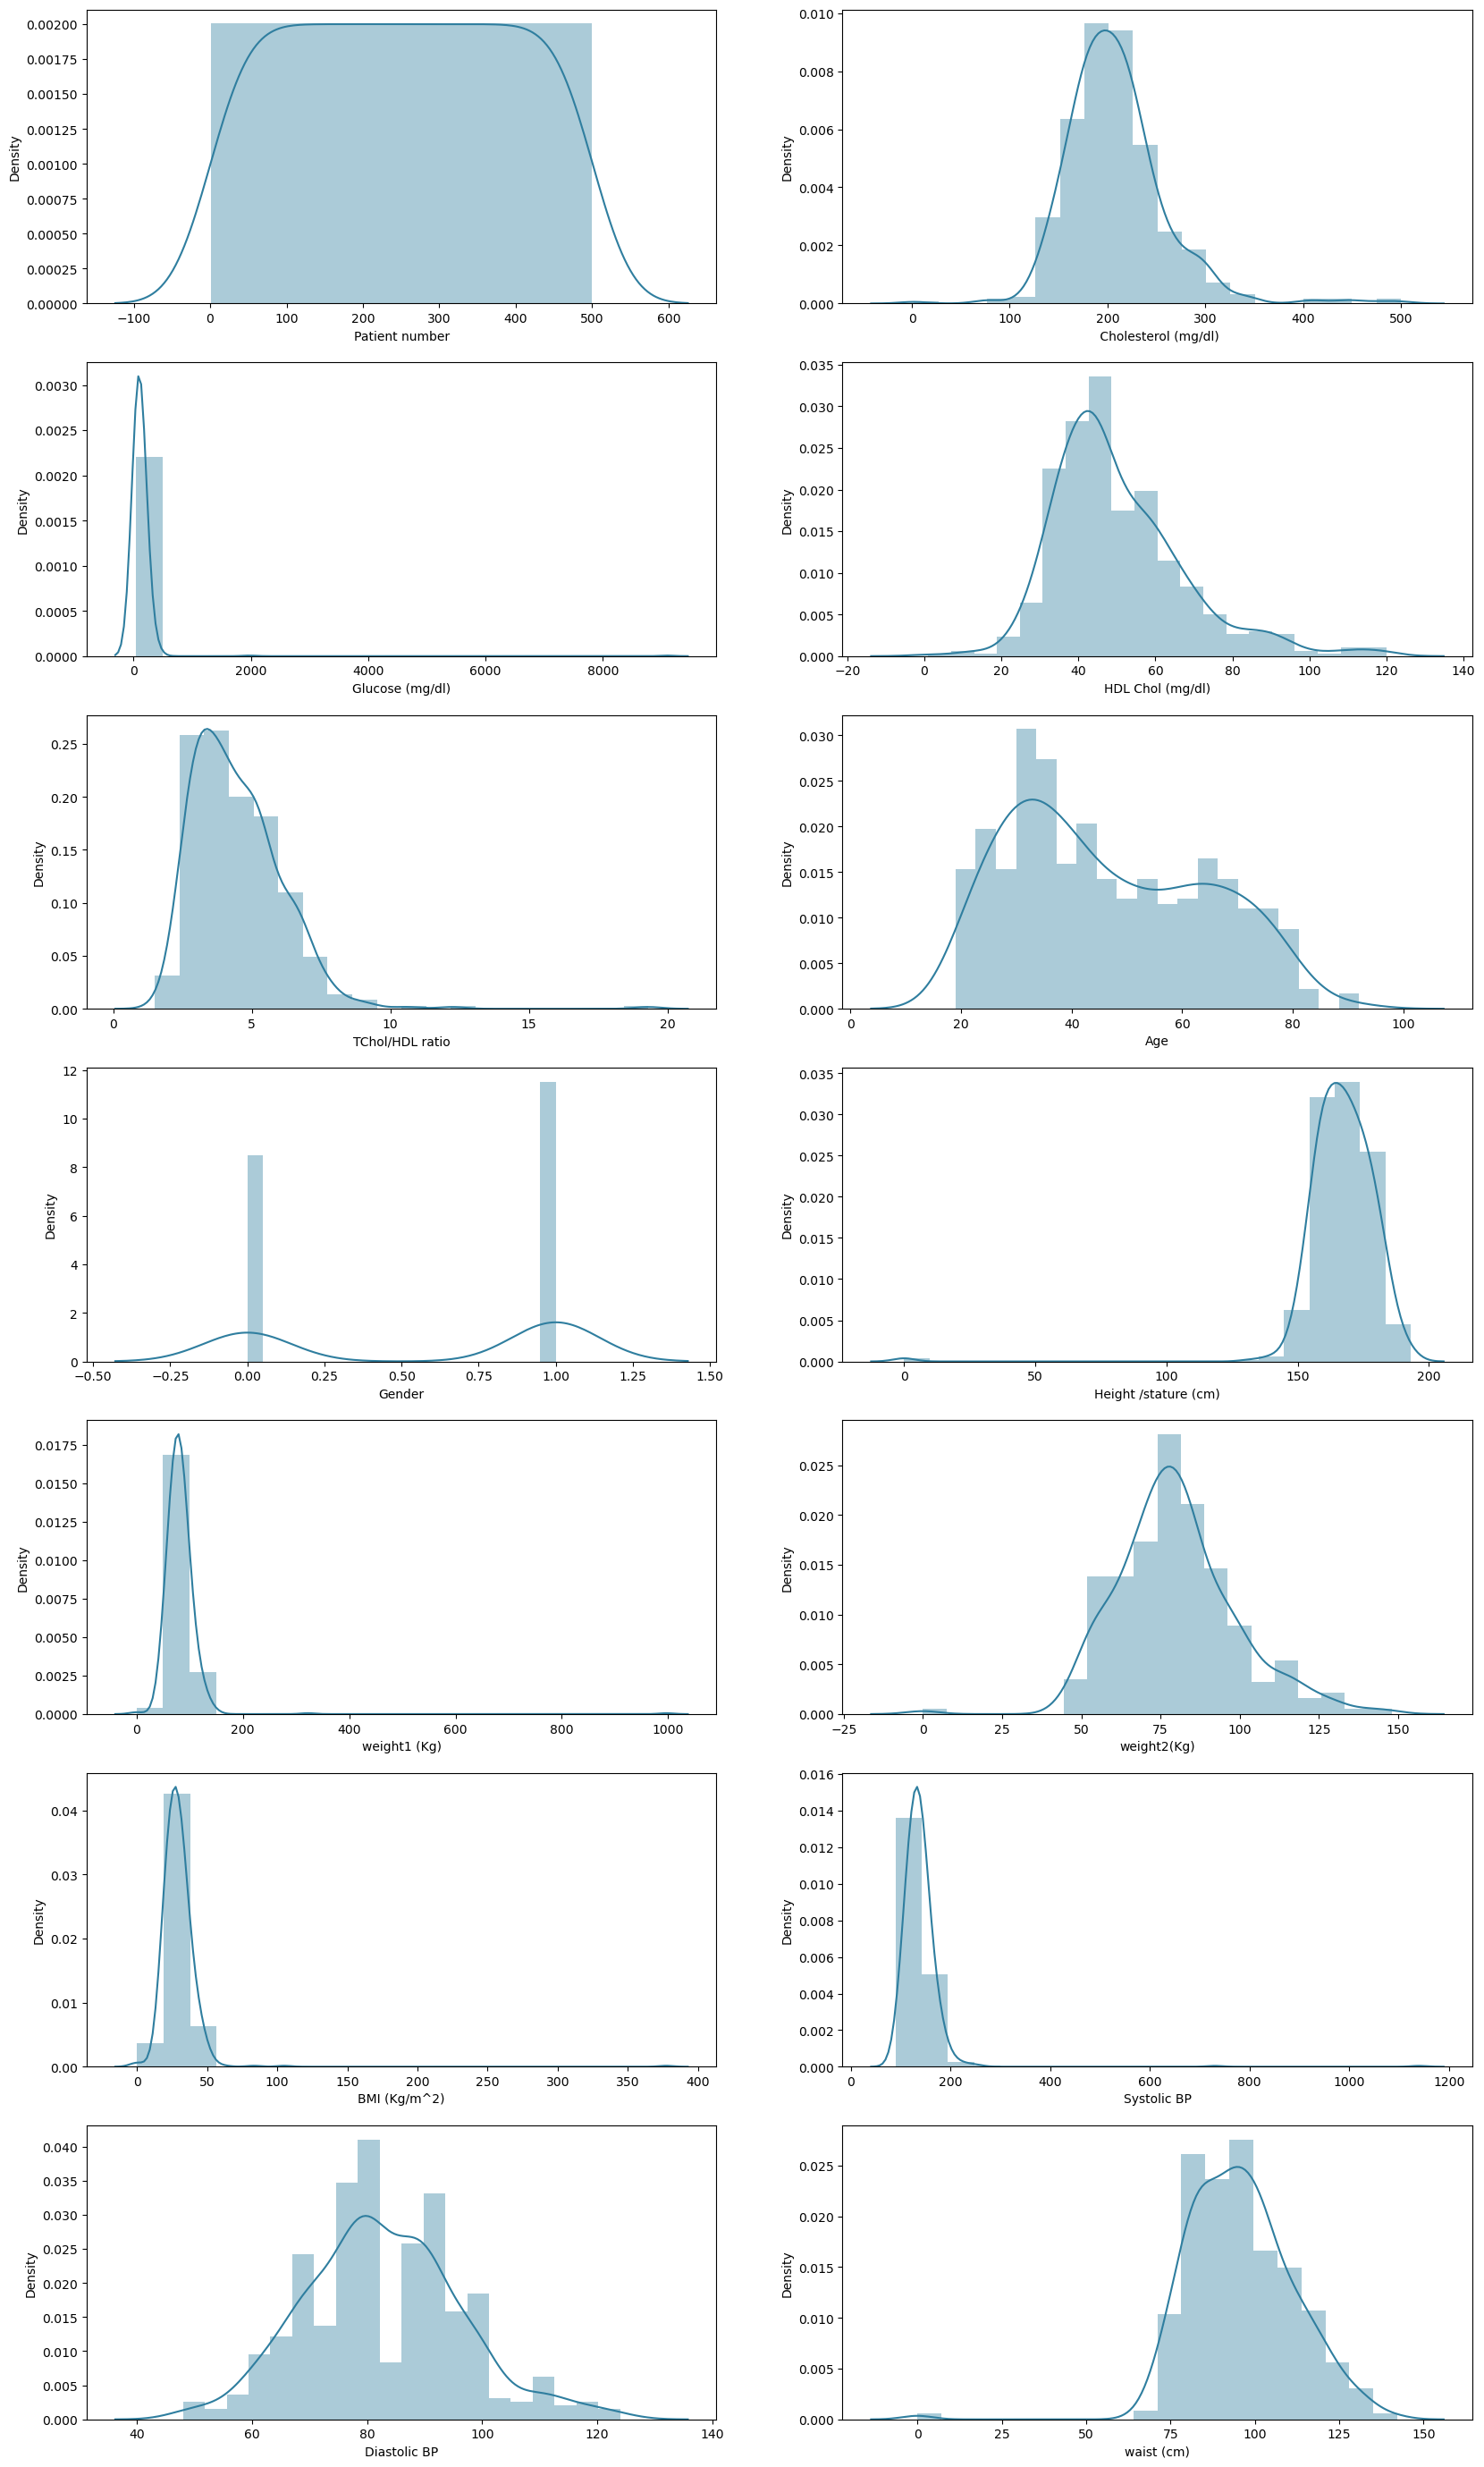

In [11]:
#visualising the features and labels as graphs to analyse how the data is distributed
rows = np.arange(7)
columns = np.arange(2)
fig, ax = plt.subplots(7, 2, figsize=(20, 35))
index = 0
for row in rows:
    for col in columns:
        sns.distplot(df[df.columns[index]],
                     bins=20,
                     ax=ax[row, col],
                     color='#2F7E9F')
        index += 1

## 2. Feature Selection

- Using too many features can make the model more complex
- Including irrelevant or redundant features can increase the model's complexity 

###### removing patient number as it is not informative and to avoid overfitting

In [12]:
df = df.drop('Patient number', axis=1)

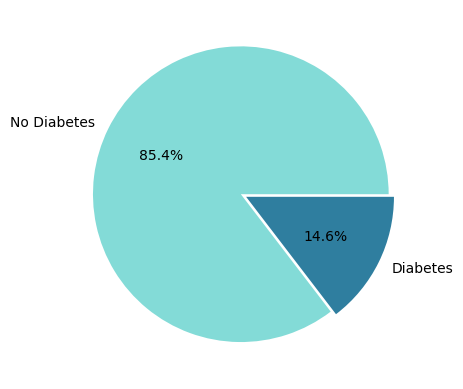

In [13]:
# counting data with and without diabetes
plt.pie(df.Diabetes.value_counts(),
        labels=['No Diabetes', 'Diabetes'],
        autopct='%1.1f%%',
        colors=['#83DBD7', '#2F7E9F'],
        explode=[0, 0.04])
plt.show()

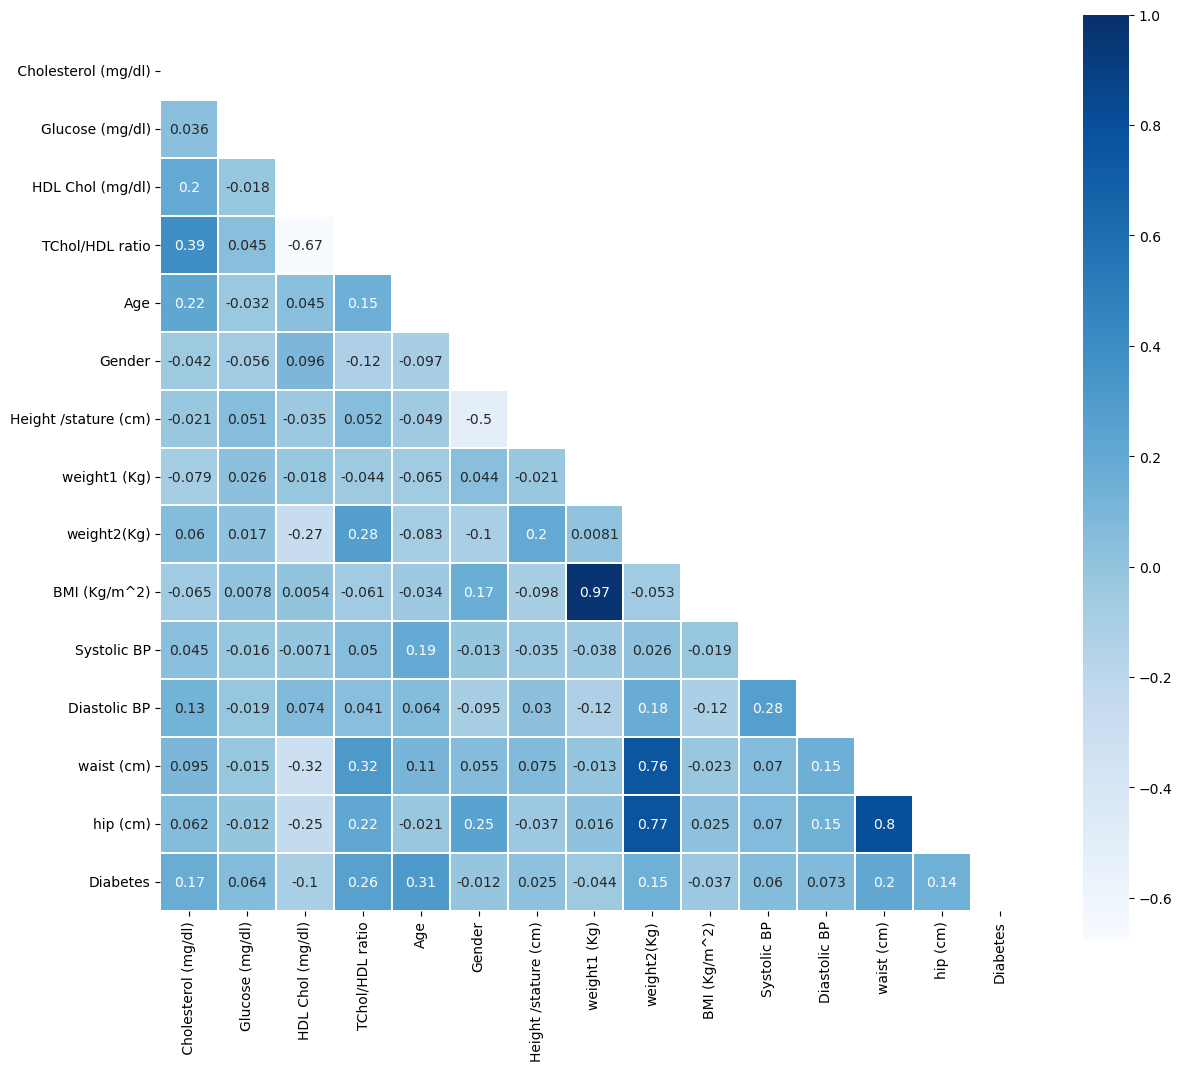

In [14]:
# finding the correlation between the features
corr = df.astype(float).corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr,
            linewidths=0.1,
            vmax=1.0,
            square=True,
            linecolor='white',
            annot=True,
            cmap="Blues",
            mask=np.triu(corr))
plt.show()

##### To reduce the risk of overfitting and improve the model's ability to generalize to new data,  removing the highly correlated features
- BMI and weight1 are highly correlated, as article#1 (from the coursework) suggests BMI is stronger predictor for Diabetes than weight, it would be better to remove weight1
- waist is highly correlated with hip and weight2, removing waist would be an good option but waist circumference plays an important role in diabetes as per article#1. So ignoring this

In [15]:
df = df.drop('weight1 (Kg)', axis=1)
df.shape

(500, 14)

## 3. Feature Engineering

- Using domain knowledge of the data to create features that make models work better
- It can help capture nonlinear relationships in the data. 


#### 3.1. Categorizing a continuous feature such as BMI into categories can help capture nonlinear relationships between that feature and the target variable

<div>
<img src="bmiCalculation.jpg" width="400" style="margin-left:0"/>
</div>


_using the BMI Categories reference given in the coursework_

In [16]:
NewBMI = pd.Series([
    "Underweight", "Normal", "Overweight", "Obesity1", "Obesity2",
    "ExtremeObesity"
],
                   dtype="category")
df["NewBMI"] = NewBMI
df.loc[df["BMI (Kg/m^2)"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI (Kg/m^2)"] > 18.5) & (df["BMI (Kg/m^2)"] <= 24.9),
       "NewBMI"] = NewBMI[1]
df.loc[(df["BMI (Kg/m^2)"] > 24.9) & (df["BMI (Kg/m^2)"] <= 29.9),
       "NewBMI"] = NewBMI[2]
df.loc[(df["BMI (Kg/m^2)"] > 29.9) & (df["BMI (Kg/m^2)"] <= 34.9),
       "NewBMI"] = NewBMI[3]
df.loc[(df["BMI (Kg/m^2)"] > 34.9) & (df["BMI (Kg/m^2)"] <= 39.9),
       "NewBMI"] = NewBMI[4]
df.loc[df["BMI (Kg/m^2)"] > 39.9, "NewBMI"] = NewBMI[5]


##### 3.2.  Categorising TChol/HDL ratio (_As per the article#4_)

In [17]:
NewCholHDLRatio = pd.Series(["LessRisk", "HighRisk"], dtype="category")
df["NewChol/HDLRatio"] = NewCholHDLRatio
df.loc[df["TChol/HDL ratio"] < 5, "NewChol/HDLRatio"] = NewCholHDLRatio[0]
df.loc[df["TChol/HDL ratio"] >= 5, "NewChol/HDLRatio"] = NewCholHDLRatio[1]

In [18]:
df.head()  #visualising newly added columns

,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm),Diabetes,NewBMI,NewChol/HDLRatio
0,193.0,77.0,49.0,3.9,19,1.0,154.9,54,22.88,118.0,70.0,81.3,96.5,0.0,Normal,LessRisk
1,146.0,79.0,41.0,3.6,19,1.0,152.4,61,42.61,108.0,58.0,83.8,101.6,0.0,ExtremeObesity,LessRisk
2,217.0,75.0,54.0,4.0,20,1.0,170.2,85,40.13,110.0,72.0,101.6,114.3,0.0,ExtremeObesity,LessRisk
3,226.0,97.0,70.0,3.2,20,1.0,162.6,52,20.44,122.0,64.0,78.7,99.1,0.0,Normal,LessRisk
4,164.0,91.0,67.0,2.4,20,1.0,177.8,64,26.28,122.0,86.0,81.3,99.1,0.0,Overweight,LessRisk


##### One hot encoding
- using one hot encoding to convert categorical data to numberical 
- Inorder to avoid dummy variable trap( causes multicollineartiy ), dropping one of those columns

In [19]:
df = pd.get_dummies(df,
                    columns=["NewBMI", "NewChol/HDLRatio"],
                    drop_first=True)
diabetes = df.pop('Diabetes')
df.insert(len(df.columns), 'Diabetes', diabetes)
df.head()

,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm),NewBMI_Normal,NewBMI_Obesity1,NewBMI_Obesity2,NewBMI_Overweight,NewBMI_Underweight,NewChol/HDLRatio_LessRisk,Diabetes
0,193.0,77.0,49.0,3.9,19,1.0,154.9,54,22.88,118.0,70.0,81.3,96.5,1,0,0,0,0,1,0.0
1,146.0,79.0,41.0,3.6,19,1.0,152.4,61,42.61,108.0,58.0,83.8,101.6,0,0,0,0,0,1,0.0
2,217.0,75.0,54.0,4.0,20,1.0,170.2,85,40.13,110.0,72.0,101.6,114.3,0,0,0,0,0,1,0.0
3,226.0,97.0,70.0,3.2,20,1.0,162.6,52,20.44,122.0,64.0,78.7,99.1,1,0,0,0,0,1,0.0
4,164.0,91.0,67.0,2.4,20,1.0,177.8,64,26.28,122.0,86.0,81.3,99.1,0,0,0,1,0,1,0.0


## 4. Evaluate Models

- To generalise the models 
- To compare the results of the models

In [20]:
import random
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,f1_score, accuracy_score,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
X = df.iloc[:, :-1].values  # taking all rows , all columns except last column as independent variables(features)
y = df.iloc[:,-1]  # taking all rows, last column as dependent variable(labels) ie. Diabetes

#### Splitting data( train, validate, test)
- to make the model learn more, assigning more data for training set
- to tune the model parameters using validation set

In [22]:
#splitting training & testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state=42)

#### Scaling
- using standard scaling to standardizes the data to have zero mean and unit variance.

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

##### Since the problem is classification, selecting the best classification algorithms

In [24]:
#defining all necessary models for classification
def getBaseModels():
    baseModels = []
    baseModels.append(('LR', LogisticRegression()))
    baseModels.append(('KNN', KNeighborsClassifier()))
    baseModels.append(('DT', DecisionTreeClassifier()))
    baseModels.append(('NB', GaussianNB()))
    baseModels.append(('SVC', SVC(probability=True)))
    baseModels.append(('AB', AdaBoostClassifier()))
    baseModels.append(('GB', GradientBoostingClassifier()))
    baseModels.append(('RF', RandomForestClassifier()))
    baseModels.append(('ET', ExtraTreesClassifier()))
    return baseModels

#### K-fold cross-validation
- To avoid overfitting models are validated with K value as 10

In [25]:
#using k-fold on training data to evaluate the model accuracy
models = getBaseModels()
modelScores = []
modelStd = []
modelNameList = []
for name, model in models:
    cv = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model,X_train,y_train,cv=cv,scoring="accuracy",error_score="raise")
    modelScores.append(cv_results.mean()*100)
    modelNameList.append(name)
    modelStd.append(cv_results.std())

modelScores = np.round(modelScores, 2)
modelStd = np.round(modelStd, 2)
modelResult = pd.DataFrame({
    'Models': modelNameList,
    'Scores': modelScores,
    'σ': modelStd
})
print(modelResult.sort_values(by=['Scores', 'σ'], ascending=False))

  Models  Scores     σ
0     LR   92.00  0.07
7     RF   92.00  0.07
6     GB   92.00  0.06
2     DT   91.33  0.06
4    SVC   91.00  0.06
8     ET   90.67  0.07
5     AB   90.33  0.06
1    KNN   88.67  0.07
3     NB   86.00  0.07


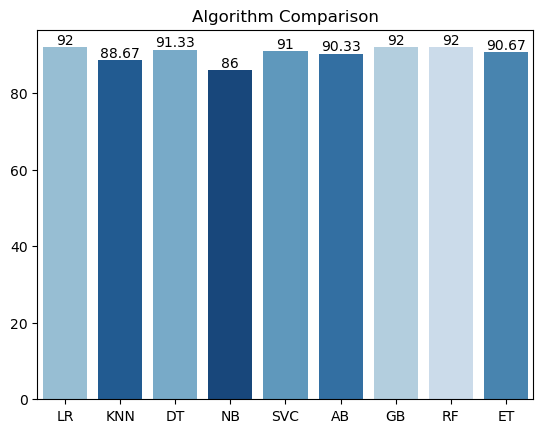

In [26]:
#visualing the models performance
plt.title('Algorithm Comparison')
pal = sns.color_palette("Blues", len(modelScores)+2)
rank = modelScores.argsort().argsort()
ax=sns.barplot(y=modelScores, x=modelNameList, palette=np.array(pal[::-1])[rank])
ax.bar_label(ax.containers[0])
plt.show()

## 5. Model Tuning

- Tuning the hyperparameters of the model to increase model's performance and to make the prediction more generalizable
- GridSearchCV - finding optimal parameters from given set 


In [27]:
def gridSearchFunction(model, params, cv, X_val, y_val):
    gs = GridSearchCV(model, param_grid=params, cv=cv)
    gs.fit(X_val, y_val)
    print("accuracy: %.4f" % gs.best_score_)
    print("best params:", gs.best_params_)
    return gs.best_params_

In [28]:
### KNN
# n_neighbors: Number of neighbors to use by default for k_neighbors queries


param_grid = {
    "n_neighbors":
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
}
model = KNeighborsClassifier()
bestParams = gridSearchFunction(model, param_grid, 5, X_val, y_val)

accuracy: 0.8667
best params: {'n_neighbors': 12}


In [29]:
### SVC
# C: The Penalty parameter C of the error term.
# Kernel: Kernel type could be linear, poly, rbf or sigmoid.


param_grid = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
}
model = SVC()
bestParams = gridSearchFunction(model, param_grid, 5, X_val, y_val)

accuracy: 0.8533
best params: {'C': 0.5, 'kernel': 'sigmoid'}


In [30]:
### Decision Tree
# max_depth: Maximum depth of the tree (double).
# row_subsample: Proportion of observations to consider (double).
# max_features: Proportion of columns (features) to consider in each level (double).


param_grid = {
    "max_depth": [3, None],
    'max_features': [random.randint(1, 4)],
    'min_samples_leaf': [random.randint(1, 4)],
    'criterion': ["gini", "entropy"]
}
model = DecisionTreeClassifier()
bestParams = gridSearchFunction(model, param_grid, 5, X_val, y_val)

accuracy: 0.8400
best params: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3}


In [31]:
### Random forest
# n_estimators: The number of trees in the forest.
# max_depth: The maximum depth of the tree


param_grid = {"max_depth": [5, 10, None], "n_estimators": [50, 100, 200]}
model = RandomForestClassifier()
bestParams = gridSearchFunction(model, param_grid, 5, X_val, y_val)

accuracy: 0.9067
best params: {'max_depth': None, 'n_estimators': 100}


In [32]:
### AdaBoostClassifier
# learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.
# n_estimators: Number of trees to build.


param_grid = {
    "learning_rate": [.01, .05, .1, .5, 1],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}
model = AdaBoostClassifier()
bestParams = gridSearchFunction(model, param_grid, 5, X_val, y_val)

accuracy: 0.8800
best params: {'learning_rate': 0.01, 'n_estimators': 250}


In [33]:
### GradientBoostingClassifier
# learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.
# n_estimators: Number of trees to build.


param_grid = {
    "learning_rate": [.01, .05, .1, .5, 1],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}
model = GradientBoostingClassifier()
bestParams = gridSearchFunction(model, param_grid, 5, X_val, y_val)

accuracy: 0.8667
best params: {'learning_rate': 0.01, 'n_estimators': 100}


In [34]:
### ExtraTreesClassifier
# n_estimators: The number of trees in the forest.
# max_depth: The maximum depth of the tree


param_grid = {"max_depth": [5, 10, None], "n_estimators": [50, 100, 200]}
model = ExtraTreesClassifier()
bestParams = gridSearchFunction(model, param_grid, 5, X_val, y_val)

accuracy: 0.8667
best params: {'max_depth': 5, 'n_estimators': 200}


##### Naive bayes is rejected because the model perfoms lesser than others

In [36]:
#updating the models with best parameters

param = {'n_neighbors': 12}
model1 = KNeighborsClassifier(**param)

param = {'C': 0.5, 'kernel': 'sigmoid'}
model2 = SVC(probability=True, **param)

param = {
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 1,
    'min_samples_leaf': 3
}
model3 = DecisionTreeClassifier(**param)

param = {'max_depth': None, 'n_estimators': 100}
model4 = RandomForestClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 250}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 100}
model6 = GradientBoostingClassifier(**param)

param = {'max_depth': 5, 'n_estimators': 200}
model7 = ExtraTreesClassifier(**param)

In [37]:
def updatedBaseModels():
    baseModels = []
    baseModels.append(('KNN', model1))
    baseModels.append(('SVC', model2))
    baseModels.append(('DT', model3))
    baseModels.append(('RF', model4))
    baseModels.append(('AB', model5))
    baseModels.append(('GB', model6))
    baseModels.append(('ET', model7))
    return baseModels

## 6. Ensemble Methods

- combines the predictions of multiple models to make a more accurate prediction
- to improve the generalizability and robustness

In [38]:
# predicts the dependent value based on training
def model_predict(classifier, X_train, y_train, X_test):
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def display_result(modelName, classifier, X_train, y_train, X_test, y_test):
    y_pred = model_predict(classifier, X_train, y_train, X_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
    plt.title(modelName)
    plt.show()
    accuracy = np.round(accuracy_score(y_test, y_pred),2)
    auc = np.round(roc_auc_score(y_test, y_pred),2)
    f1 =  np.round(f1_score(y_test, y_pred, average='macro'),2)
    roc= metrics.roc_curve(y_test, y_pred)
    result = pd.DataFrame({
        'Model':[modelName],
        'Accuracy': [accuracy],
        'AUC Score': [auc],
        'F1 Score':[f1],
        'ROC': [roc]
    })
    return result

    
def compareResults(modelList):
    frames=[]
    for model in modelList:
        frames.append(model)
    result = pd.concat(frames)
    result = pd.melt(frame = result.iloc[:,0:-1],id_vars = 'Model',var_name = 'Statistic',value_name = 'value')
    ax=sns.barplot(data = result, x = 'Model', y = 'value', hue = 'Statistic',palette='Blues')
    sns.move_legend(ax, "lower right")
    for i in ax.containers:
        ax.bar_label(i,)

    #roc curve
    plt.figure(0).clf()
    plt.plot([0,1], [0,1], color='black', linestyle='--')
    for model in modelList:
        roc = model['ROC'].values
        fpr, tpr, _ = roc[0]
        auc = model['AUC Score'].values
        plt.plot(fpr,tpr,label=model.iloc[:,0][0]+', AUC='+str(auc))
    plt.legend(loc='lower right')
    plt.show()


### 6.1. Voting Ensemble
- multiple models are trained on the same data and their predictions are combined to make a final prediction
- to make the prediction based on the majority of voting, hard voting is chosen

In [39]:
from sklearn.ensemble import VotingClassifier

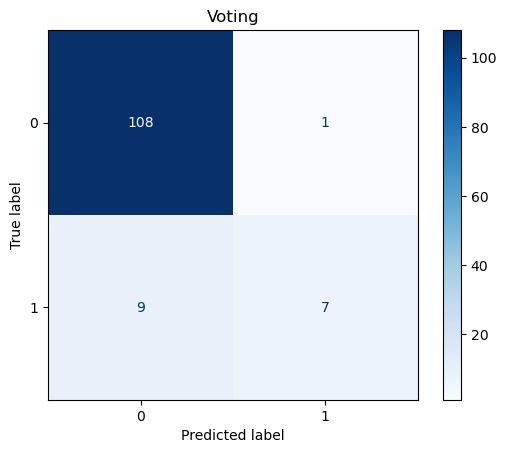

In [40]:
baseModels = updatedBaseModels()
votingModel = VotingClassifier(baseModels, voting='hard')
votingRes=display_result('Voting', votingModel, X_train, y_train, X_test, y_test)

### 6.2 Stacking Ensemble

- Since the meta-model is able to learn how to combine the predictions of the base models in a way that is more accurate than simply taking the majority vote
- Using Gradient Boosting as metamodel since it has high accuracy rate

In [41]:
from sklearn.ensemble import StackingClassifier

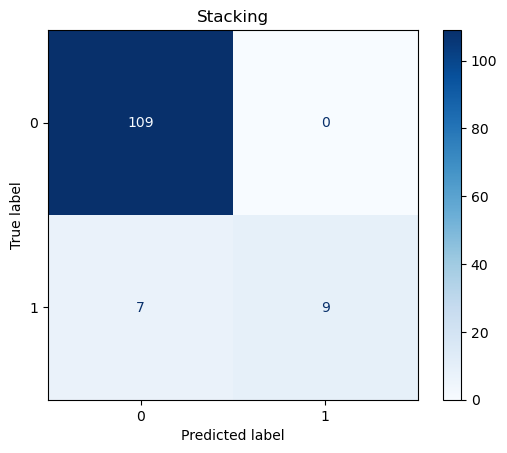

In [42]:
baseModels = updatedBaseModels()
baseModels.remove(('GB', model6)) #removing gradient boosting from basemodels since using GB as metamodel
metaModel = GradientBoostingClassifier(n_estimators=150,
                                       loss="exponential",
                                       max_features=6,
                                       max_depth=3,
                                       subsample=0.5,
                                       learning_rate=0.01)
stackModel = StackingClassifier(estimators=baseModels,
                                final_estimator=metaModel)
stackingRes=display_result('Stacking', stackModel, X_train, y_train, X_test, y_test)

### 6.3 Comparing finals results

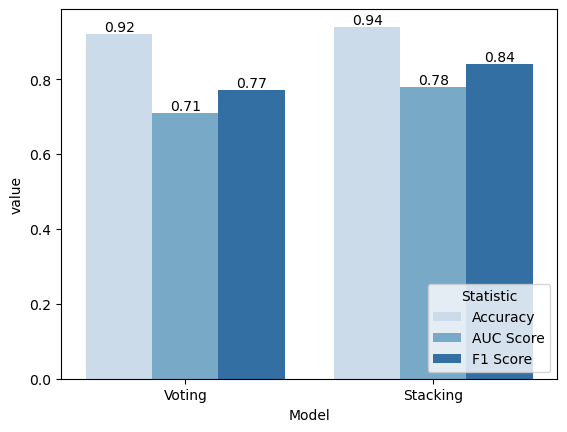

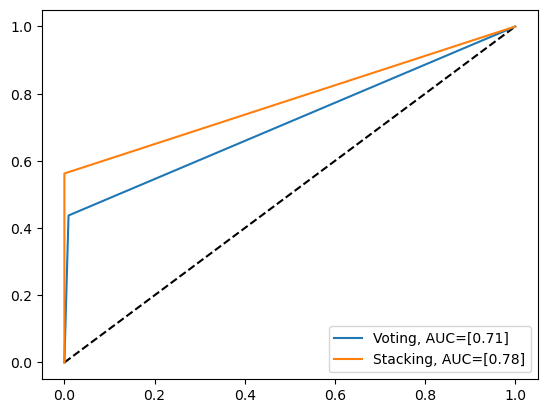

In [43]:
models=[votingRes,stackingRes]
compareResults(models)

## 7. Conculsion
- Thus the stacking ensemble model performs well with the accuracy of ~94%
- Using medical articles:
    - Though we could find the correlation between the data without the use of the medical articles, the domain knowledge is important for feature engineering of the data(analysed in section 3)
    - Additionally, it is important to consider the ethical implications of using data for decision-making, particularly in the healthcare domain where the consequences of errors/biases can be significant.